Let's get a list of all of our MPs first

In [14]:
import requests
import json

#Dewan Rakyat MP Posts in Sinar Malaysia Popit Database

dewan_rakyat_request = requests.get('https://sinar-malaysia.popit.mysociety.org/api/v0.1/organizations/53633b5a19ee29270d8a9ecf')

posts = json.loads(dewan_rakyat_request.content)['result']['memberships']

Now we will load up information on the MPs holding these posts

In [15]:
MP_ids = []

#Current MPs should not have any end dates
for member in posts:
    #db not always clean, making sure either no end_date or empty value
    
    if member.has_key('end_date'):
        if member['end_date'] == '':
            MP_ids.append(member['person_id'])
            
    if not member.has_key('end_date'):
        MP_ids.append(member['person_id'])
        
#There are some bad data during automated import from GE13 results.
#This will be cleaned up in a few weeks, but we check for duplicates just in case.
#There should only ever be 1 person holding 1 post at a moment in time.

def uniq(seq):
    #http://www.peterbe.com/plog/uniqifiers-benchmark
    seen = set()
    seen_add = seen.add
    return [ x for x in seq if not (x in seen or seen_add(x))]

def person(person_id):
    #Load up information of persons from Popit database
    req = requests.get('https://sinar-malaysia.popit.mysociety.org/api/v0.1/persons/' + person_id)
    return json.loads(req.content)['result']

import datetime
from dateutil import parser

def age(str):
    #calculate age based on date strings stored in Popit
    born = parser.parse(str)
    today = datetime.date.today()
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day)) 
    return int(age)
    
MP_ids = uniq(MP_ids)

#Pull down the data of current MPs from Popit Database
MPs = []
for id in MP_ids:
    person_data = person(id)
    if person_data.has_key('birth_date'):
        if person_data['birth_date']:
            #add current age in addition to the values in Popit
            person_data['age'] = age(person_data['birth_date'])
            MPs.append(person_data)
    

Fun with data!

In [16]:
import numpy

#list of ages
ages = []
for i in MPs:
    ages.append(int(i['age']))
    
print numpy.median(ages)
print numpy.max(ages)
print numpy.min(ages)


56.0
78
32


Pandas
=====

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

If you're learning Python to work with data, it's worth getting used to this library, as it provides pretty much all you will need when working with data from importing and cleaning messy data, to exporting it, including working with very large data sets.

A lot of the earlier work, such as cleaning, getting unique values etc. could be done easily with built-in functions of pandas as a DataFrame.

In [17]:
import pandas

pandas.DataFrame(MPs)

,age,birth_date,contact_details,death_date,dissolution_date,end_date,founding_date,html_url,id,identifiers,...,initials,links,memberships,name,other_names,proxy_image,sources,start_date,summary,url
0,49,1965-10-18,"[{u'type': u'phone number', u'id': u'55829d6e8...",None,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,5364fd73f1eab6270da6c8fa,[],...,NaN,"[{u'url': u'http://www.pkamalanathan.com/', u'...","[{u'area_id': None, u'area_name': None, u'cont...",P. Kamalanathan,[{u'name': u'Kamalanathan s/o. P. Panchanathan...,https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Kamalanathan s/o. P. Panchanathan (or YB Kamal...,https://sinar-malaysia.popit.mysociety.org/api...
1,46,1968-12-18,"[{u'type': u'Email', u'id': u'55830016f3c3651a...",None,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,53635149f1eab6270da6c8f6,[],...,NaN,[{u'url': u'https://en.wikipedia.org/wiki/Wong...,"[{u'area_id': None, u'contact_details': [], u'...",Wong Chen,[],https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Wong Chen is a Malaysian politician and is the...,https://sinar-malaysia.popit.mysociety.org/api...
2,39,1975-09-12,"[{u'type': u'phone', u'id': u'558337eef3c3651a...",NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e48755222837c2c0596a7,[],...,NaN,"[{u'url': u'http://ongkianming.com', u'note': ...","[{u'contact_details': [], u'links': [], u'end_...",Ong Kian Ming,"[{u'name': u'王建民', u'id': u'558337eef3c3651a49...",https://sinar-malaysia.popit.mysociety.org/ima...,"[{u'url': u'http://ongkianming.com', u'note': ...",NaN,Dr. Ong Kian Ming was elected as a first-time ...,https://sinar-malaysia.popit.mysociety.org/api...
3,60,1955-03-28,"[{u'type': u'phone number', u'id': u'557bf388d...",None,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,53672a67f1eab6270da6c8ff,[],...,NaN,[{u'url': u'http://en.wikipedia.org/wiki/Micha...,"[{u'area_id': None, u'area_name': None, u'cont...",Michael Jeyakumar Devaraj,[],https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Michael Jeyakumar Devaraj is a Malaysian polit...,https://sinar-malaysia.popit.mysociety.org/api...
4,57,1958-03-14,"[{u'type': u'phone number', u'id': u'5582b1d60...",NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e46125222837c2c0590c5,[],...,NaN,"[{u'url': u'https://twitter.com/ybz99', u'note...","[{u'contact_details': [], u'links': [], u'url'...",Zuraida Kamaruddin,[],https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api...
5,57,1957-10-07,"[{u'type': u'facebook', u'id': u'5571b54a46ee1...",NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e425c5222837c2c058787,[],...,NaN,"[{u'url': u'Official Website', u'note': u'http...","[{u'contact_details': [], u'links': [], u'end_...",Tan Kok Wai,[],https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Tan Kok Wai (born 7 October 1957) is a Malaysi...,https://sinar-malaysia.popit.mysociety.org/api...
6,64,1950-12-20,"[{u'type': u'facebook', u'id': u'5571b51646ee1...",NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e431c5222837c2c058965,[],...,NaN,[{u'url': u'http://officialkunan.blogspot.com/...,"[{u'contact_details': [], u'links': [], u'end_...",Tengku Adnan Tengku Mansor,"[{u'note': u'With honorifics', u'name': u'Datu...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Datuk Seri Tengku Adnan bin Tengku Mansor is a...,https://sinar-malaysia.popit.mysociety.org/api...
7,37,1977-11-27,"[{u'type': u'facebook', u'id': u'5571b86f5ccbb...",NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e436c5222837c2c058a2c,[],...,NaN,"[{u'url': u'http://liewchintong.com/', u'note'...","[{u'contact_details': [], u'end_date': u'2013'...",Liew Chin Tong,[],https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Liew Chin Tong (Chinese: 劉鎮東; pinyin: Liú Zhèn...,https://sinar-malaysia.popit.mysociety.org/api...
8,58,1956-09-11,[],NaN,NaN,NaN,NaN,http

In [18]:
df = pandas.DataFrame(MPs)


print df['age'].median()
print df['age'].max()
print df['age'].min()

56.0
78
32


We could have dropped duplicates from bad data: 

df.drop_duplicates('id')

Parse and set birth_date column as datetime to calculate age without parsing it manually:

df['birth_date']= pandas.to_datetime(df['birth_date'])

Best of all after cleaning up the data, we can easily export it to CSV format where it is more easily usable by normal users in spreadsheets or plotting charts.

In [19]:
MP_source = {'name':df['name'],'birth_date':df['birth_date'],'age':df['age']}

In [20]:
MP_Names = pandas.DataFrame(MP_source)

MP_Names.sort('age')

,age,birth_date,name
49,32,1982-10-17,Zairil Khir Johari
50,33,1982-05-13,Sim Chee Keong
89,34,1981-01-27,Teo Nie Ching
63,34,1980-11-19,Nurul Izzah Anwar
47,35,1979-08-09,Kasthuriraani Patto
7,37,1977-11-27,Liew Chin Tong
75,37,1977-10-19,Chua Tee Yong
65,38,1977-04-28,Loke Siew Fook
70,38,1976-11-13,Mas Ermieyati Samsudin
2,39,1975-09-12,Ong Kian Ming


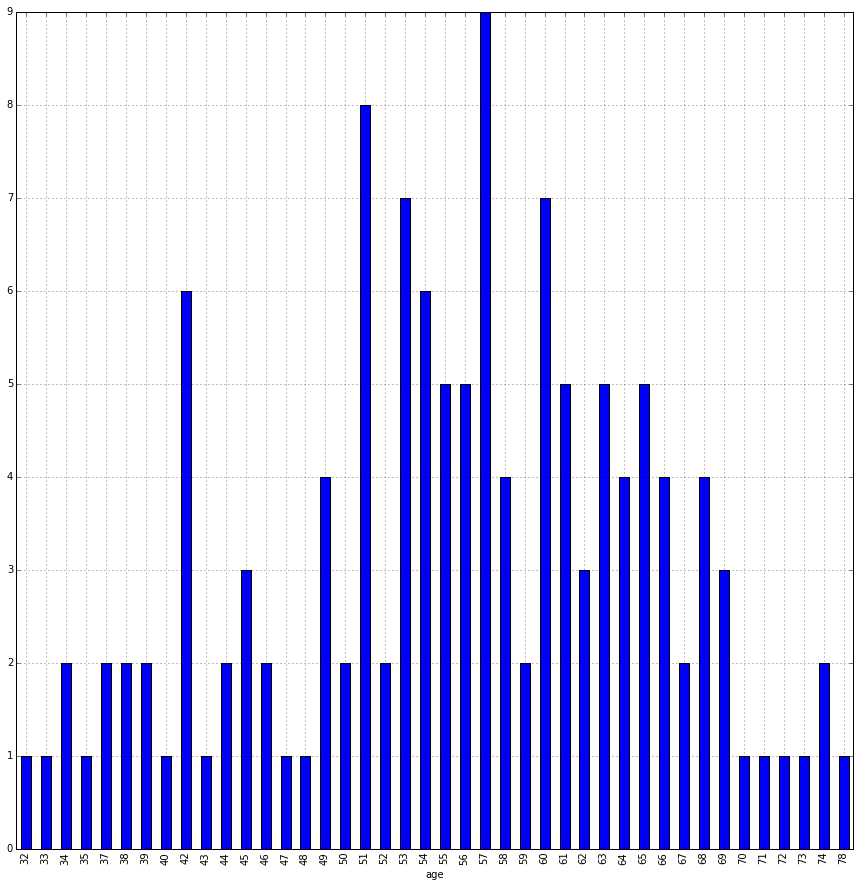

In [21]:
%matplotlib inline 
grouped = MP_Names.groupby('age')
grouped.age.count().plot(kind='bar',figsize=(15,15))

Previous example tried to massage python data structures into Pandas DataFrame which works, but isn't very pretty.

Ng Swee Meng <sweester@sinarproject.org> has contributed proper way of building up data structures for Pandas DataFrames in the following example:

In [22]:
import pandas
data = { "age": [], "birth_date": []}
data_index = { "age": [], "birth_date": []}
for entry in MPs:
    data["age"].append(entry["age"])
    data_index["age"].append(entry["name"])
    data["birth_date"].append(entry["birth_date"])
    data_index["birth_date"].append(entry["name"])

final_data = { "age": pandas.Series(data["age"], index=data_index["age"]),
                "birth_date": pandas.Series(data["birth_date"], index=data_index["birth_date"])
             }
mp_age_df = pandas.DataFrame(final_data)
mp_age_df.sort("age")
    

,age,birth_date
Zairil Khir Johari,32,1982-10-17
Sim Chee Keong,33,1982-05-13
Teo Nie Ching,34,1981-01-27
Nurul Izzah Anwar,34,1980-11-19
Kasthuriraani Patto,35,1979-08-09
Liew Chin Tong,37,1977-11-27
Chua Tee Yong,37,1977-10-19
Loke Siew Fook,38,1977-04-28
Mas Ermieyati Samsudin,38,1976-11-13
Ong Kian Ming,39,1975-09-12


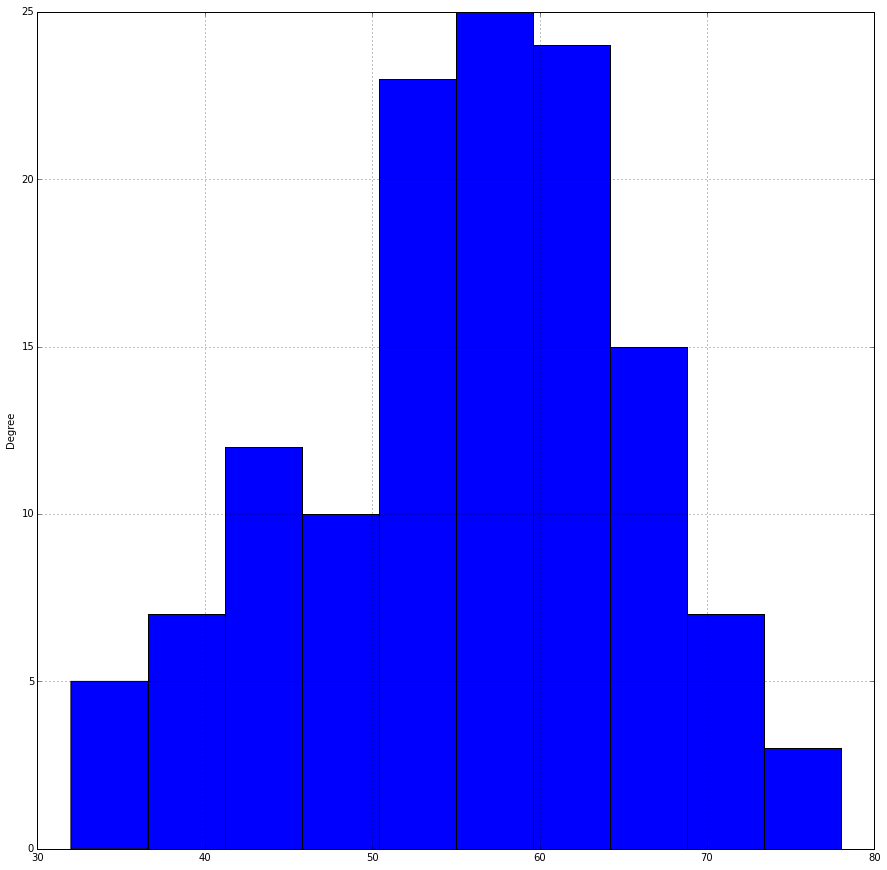

In [23]:
mp_age_df["age"].plot(kind="hist",figsize=(15,15))